# get data from google images

First scroll to load the number of images you want then run this code in the console
```javascript
const imgs=Array.from(document.querySelectorAll('.rg_i')); 
const sleep=ms=>new Promise(r=>setTimeout(r,ms));
var urls=[];
for (let i=0;i<imgs.length;i++){
    imgs[i].click();
    await sleep(1000);
    full_img=document.querySelector("img.n3VNCb.KAlRDb");
    if (full_img!=null)
    	urls.push( full_img.getAttribute("src") );
}
```
and then run this code
```javascript
window.open('data:text/csv;charset=utf-8,' + escape(urls.join("\n")));
```

In [ ]:
labels=['alligator','crocodile']
# data=pd.read_csv(f"{labels[0]}.csv")
list_of_urls=[]
for label in labels:
  with open(f"{label}.csv",'r') as f:
    list_of_urls.append(f.read().split("\n"))

In [ ]:
for i,label in enumerate(labels):
  l2=[list_of_urls[i][0]]
  for j in list_of_urls[i][1:]:
      if j not in l2:
        l2.append(j)
      else:
        print(j,"is duplicate.")
  list_of_urls[i]=l2

In [ ]:
len(list_of_urls[0]),len(list_of_urls[1])

(192, 231)

In [ ]:
import requests
import shutil
import os
from tqdm import tqdm

data_dir="dataset/"
if os.path.exists(data_dir): shutil.rmtree(data_dir)
os.mkdir(data_dir)
for i,label in enumerate(labels):
  img_dir=data_dir+label+'/'
  os.mkdir(img_dir)
  for j in tqdm(range(len(list_of_urls[i]))):
    try:
      r=requests.get(list_of_urls[i][j],stream=True,timeout=10)
      file_name=img_dir+f'{j}.jpg'
      if r.status_code==200:
        with open(file_name,'wb') as f:
          r.raw.decode_content = True
          shutil.copyfileobj(r.raw,f)
      else:
        print("Failed to get :",list_of_urls[0][0])
    except:
      print("Error")
    

  2%|▏         | 4/192 [00:00<00:05, 35.02it/s]

Error


 29%|██▉       | 56/192 [00:06<00:20,  6.48it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 38%|███▊      | 73/192 [00:08<00:11, 10.42it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 45%|████▌     | 87/192 [00:08<00:05, 19.07it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 71%|███████   | 136/192 [00:15<00:05, 10.98it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg
Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 89%|████████▊ | 170/192 [00:24<00:06,  3.52it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 94%|█████████▍| 180/192 [00:35<00:09,  1.29it/s]

Error


  2%|▏         | 4/231 [00:00<00:17, 13.23it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 15%|█▌        | 35/231 [00:01<00:07, 24.84it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 19%|█▊        | 43/231 [00:02<00:13, 14.37it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 34%|███▍      | 79/231 [00:23<01:46,  1.42it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 47%|████▋     | 109/231 [00:36<00:36,  3.33it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 59%|█████▉    | 136/231 [00:44<00:21,  4.51it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 81%|████████  | 187/231 [00:56<00:13,  3.19it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


 83%|████████▎ | 192/231 [00:58<00:09,  4.00it/s]

Failed to get : https://cdn.britannica.com/08/91308-050-59C4DF32/Crocodiles-alligators-teeth-snouts-crocodiles-mouth.jpg


100%|██████████| 231/231 [01:04<00:00,  3.61it/s]


# Get data from Bing

In [ ]:
pip install git+https://github.com/cwerner/fastclass.git>&NULL

In [ ]:
import os
import pandas as pd

if os.path.exists("dataset.csv"): os.remove("dataset.csv")
df=pd.DataFrame({"searchterm":["crocodile","alligator"],"exclude":["alligator","crocodile"]})
# df=pd.DataFrame({"searchterm":["cat","dog"],"exclude":["",""]})
df.to_csv("dataset.csv",mode="a",header=True,index=False)

In [ ]:
!head -n 3 dataset.csv

searchterm,exclude
crocodile,alligator
alligator,crocodile


In [ ]:
! fcd -c BING -s 299 dataset.csv   # working !

INFO: final dataset will be located in dataset
[1/2] Searching: >> crocodile <<
(1) Crawling ...
    -> BING
Number of duplicate image files: 0. Removing...
(2) Resizing images to (299, 299)
100% 693/693 [00:18<00:00, 36.49it/s]
[2/2] Searching: >> alligator <<
(1) Crawling ...
    -> BING
Number of duplicate image files: 0. Removing...
(2) Resizing images to (299, 299)
100% 661/661 [00:21<00:00, 30.29it/s]


In [ ]:
# !pip install google_images_download >&NULL

# get data from Kaggle

In [ ]:
!kaggle datasets download -d rrrohit/crocodile-gharial-classification-fastai

In [35]:
# get kaggle.json
!cp "kaggle.json" "/root/.kaggle/kaggle.json"

In [3]:
!kaggle datasets download -d rrrohit/crocodile-gharial-classification-fastai

 94% 396M/420M [00:03<00:00, 164MB/s]
100% 420M/420M [00:03<00:00, 124MB/s]


In [4]:
! unzip "/content/crocodile-gharial-classification-fastai.zip" >&NULL
!rm NULL

In [5]:
# shutil.rmtree("dataset/")

In [6]:
import shutil
import os

os.mkdir("dataset/")
shutil.move('alligator','dataset/alligator')
shutil.move('crocodile','dataset/crocodile')
shutil.move('gharial','dataset/gharial')

'dataset/gharial'

In [9]:
import cv2
from fastai.vision.all import get_image_files,Path

all_imgs_list=get_image_files(Path("dataset/"))
for i in range(len(all_imgs_list)):
  try:
    img_path=str(all_imgs_list[i])
    img=cv2.imread(img_path)
    img.shape
  except:
    print("bad image path:",img_path)
    os.remove(img_path)
    

bad image path: dataset/crocodile/1756250535amazing-crocodile-alligator-gif-2.gif
bad image path: dataset/crocodile/This-ancient-E28098terror-crocodileE28099-had-teeth-the-size-of-bananas-scaled.jpg
bad image path: dataset/gharial/tumblr_mimyma5Xkj1r2tfgvo8_1280.png
bad image path: dataset/gharial/tumblr_lwr9c6ulrc1qh1q7vo1_1280.jpg
bad image path: dataset/gharial/L.A.-Zoo-welcomes-rare-crocodilian-from-Singapore-Zoo-pic.gif
bad image path: dataset/gharial/Untitled-design-2-4.jpg
bad image path: dataset/gharial/Gharial_88e5ee_6833741.jpg
bad image path: dataset/gharial/Uttarakhand.jpg
bad image path: dataset/gharial/papoGavial10_zps11a04518.jpg
bad image path: dataset/gharial/tumblr_n3o7yjHg7Z1r9x8dno2_1280.jpg


In [10]:
bad_imgs_list=['dataset/alligator/EW_KH_Southern_Alligator_lizard_20100702_4761348534_81b4c9a1ae_o.jpg',
 'dataset/crocodile/Full-Grown-Crocodile-Skink.jpg',
 'dataset/crocodile/crocodile-2.jpg',
 'dataset/crocodile/o-SOUTH-BEACH-CROCODILE-facebook.jpg',
 'dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg',
 'dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg',
 'dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg']
print("Bad_images:",len(bad_imgs_list))
for bad_img_path in bad_imgs_list:os.remove(bad_img_path) 

Bad_images: 7


# Model

In [11]:
from fastai.vision.all import *

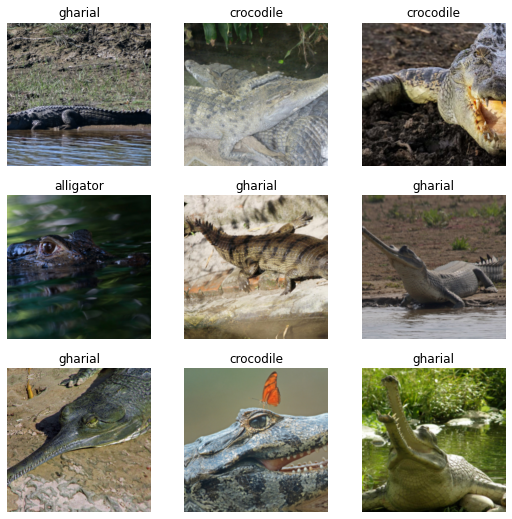

In [12]:
import numpy as np
import PIL

all_imgs_list=get_image_files(Path("dataset/"))
db=DataBlock(blocks=[ImageBlock,CategoryBlock],
              item_tfms=Resize(299),
              batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms(mult=1)],
              get_y=lambda x:str(x).rsplit("/",1)[0].rsplit("/")[1],
             )
dls=db.dataloaders(source=all_imgs_list,shuffle=True)
dls.train.show_batch()

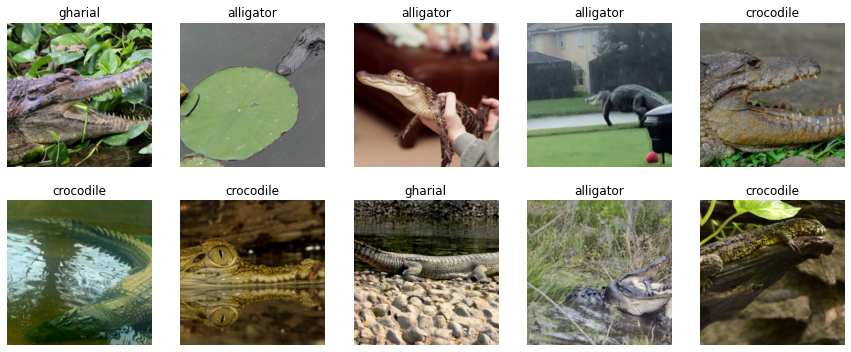

In [13]:
dls.train.show_batch(max_n=10,nrows=2)

In [14]:
learn=vision_learner(dls,models.resnet18,metrics=[error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [15]:
learn.fit_one_cycle(8)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=0.0002754228771664202)

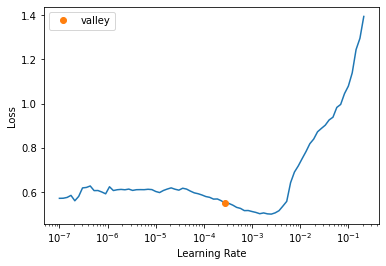

In [16]:
learn.unfreeze()
learn.lr_find()

In [17]:
learn.fit_one_cycle(n_epoch=8,lr_max=slice(1e-5,3e-4))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

In [18]:
interp=ClassificationInterpretation.from_learner(learn)

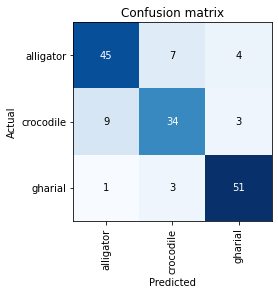

In [19]:
interp.plot_confusion_matrix()

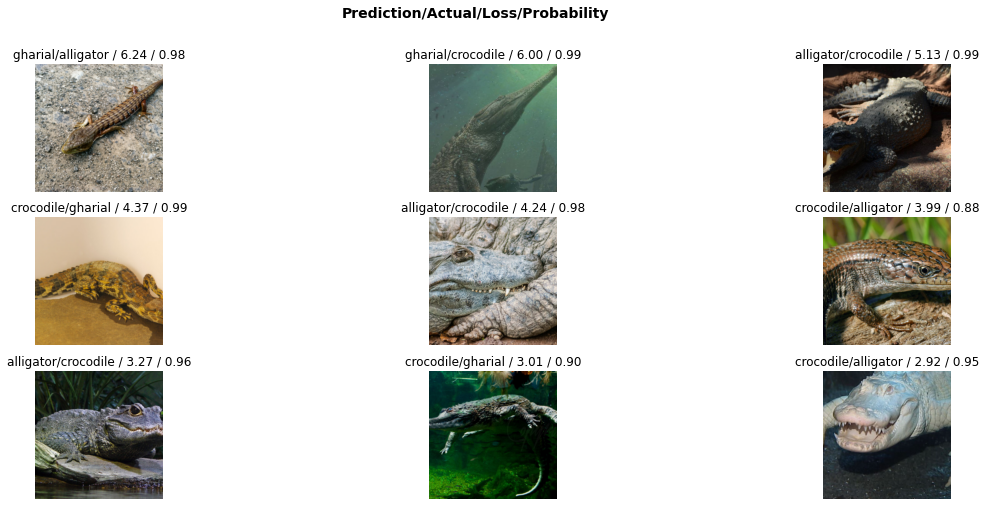

In [20]:
interp.plot_top_losses(10,figsize=(4*5,4*2))

In [21]:
interp.print_classification_report()

              precision    recall  f1-score   support

   alligator       0.82      0.80      0.81        56
   crocodile       0.77      0.74      0.76        46
     gharial       0.88      0.93      0.90        55

    accuracy                           0.83       157
   macro avg       0.82      0.82      0.82       157
weighted avg       0.83      0.83      0.83       157



In [22]:
dls.vocab

['alligator', 'crocodile', 'gharial']

crocodile:0.6283548474311829


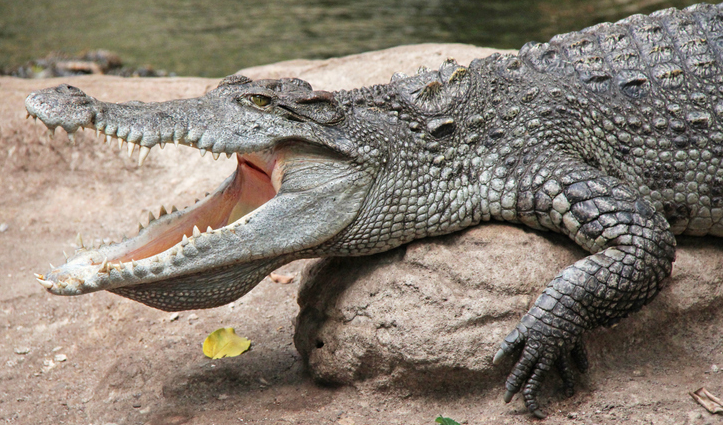

In [24]:
file_name="croc.png"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.4826778471469879


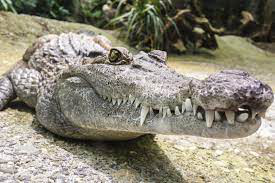

In [25]:
file_name="croc2.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

alligator:0.9999927282333374


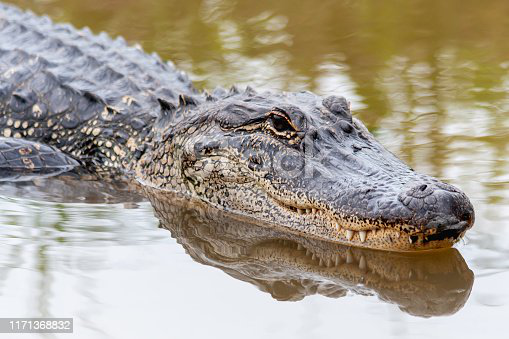

In [26]:
file_name="alliga.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

alligator:0.9992493987083435


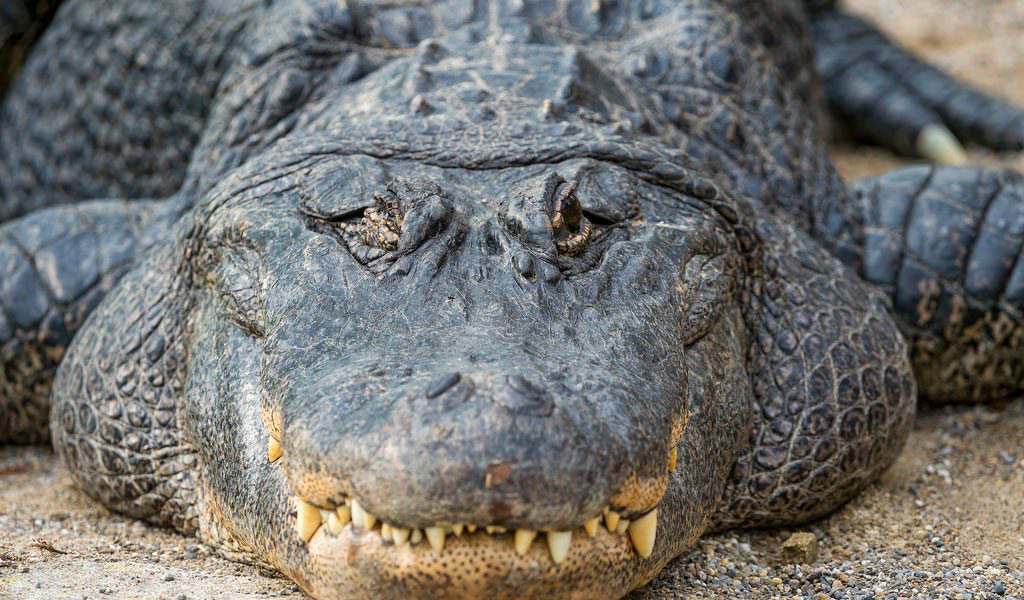

In [27]:
file_name="alliga2.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.999923825263977


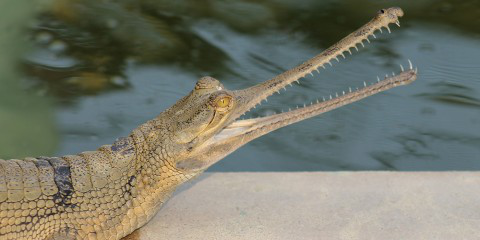

In [28]:
file_name="gharial.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

alligator:0.9232011437416077


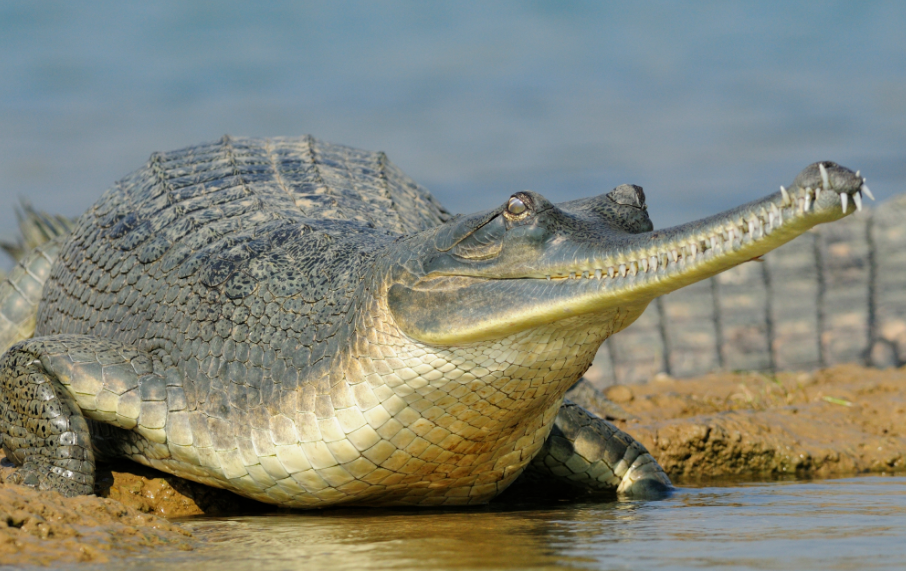

In [29]:
file_name="gharial2.png"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.9996966123580933


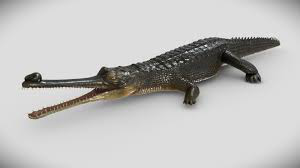

In [30]:
file_name="gharial3.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

gharial:0.9951712489128113


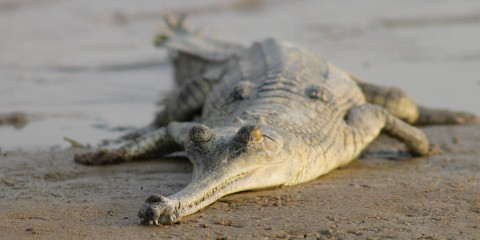

In [31]:
file_name="gharial4.jpg"
print(dls.vocab[torch.argmax(learn.predict(file_name)[2]).item()]+":"+str(torch.max(learn.predict(file_name)[2]).item()))
Image.open(file_name)

# cleaning dataset

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
    if cleaner.fns[idx] not in bad_imgs_list:
        bad_imgs_list.append(cleaner.fns[idx])
        print(cleaner.fns[idx],"deleted.")

dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg deleted.
dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg deleted.
dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg deleted.


In [ ]:
bad_imgs_list

[Path('dataset/alligator/EW_KH_Southern_Alligator_lizard_20100702_4761348534_81b4c9a1ae_o.jpg'),
 Path('dataset/crocodile/Full-Grown-Crocodile-Skink.jpg'),
 Path('dataset/crocodile/crocodile-2.jpg'),
 Path('dataset/crocodile/o-SOUTH-BEACH-CROCODILE-facebook.jpg'),
 Path('dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg'),
 Path('dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg'),
 Path('dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg')]

In [ ]:
list(map(str,bad_imgs_list))

['dataset/alligator/EW_KH_Southern_Alligator_lizard_20100702_4761348534_81b4c9a1ae_o.jpg',
 'dataset/crocodile/Full-Grown-Crocodile-Skink.jpg',
 'dataset/crocodile/crocodile-2.jpg',
 'dataset/crocodile/o-SOUTH-BEACH-CROCODILE-facebook.jpg',
 'dataset/alligator/default_2020-08-31_81b2be20-9107-4a8f-a1d4-ced89449c8d2.jpeg',
 'dataset/alligator/Blue-Mexican-Alligator-Lizard-hd-wallpaper59.jpg',
 'dataset/alligator/590a17539fcb4d4426b8e5249cc3f04df09f6278r1-1024-683v2_hq.jpg']